### Import Package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load Data and set X data and Y data

In [30]:
filename = '.\\fs23rmcf_table.csv'

In [31]:
data = pd.read_csv(filename)

# extract variable from X_data accroding to Hierarchical clustering method.
Y_data = pd.DataFrame(data,columns=["pIC50"])
X_data = data.drop("pIC50",axis=1)
X_data.head()

,ATSC3v,ATSC5c,BCUTc-1h,BCUTp-1h,BCUTw-1l,ECCEN,EStateFP28,ETA_BetaP_ns,ETA_Epsilon_5,ETA_Shape_Y,...,GATS8m,MATS2c,MATS2p,MATS6s,MDEC-23,MDEC-33,MDEO-12,VE3_Dt,VR2_D,nsNH2
0,0.569025,0.768786,0.586994,0.255852,0.995520,0.999997,0,0.846340,0.678684,0.669378,...,0.315093,0.774456,0.424844,0.493799,0.482643,0.617701,0.0,0.705536,0.191181,0.50
1,0.746605,0.442964,0.998009,0.112465,0.924044,0.999997,0,0.150210,0.842399,0.470731,...,0.331229,0.715391,0.100204,0.540075,0.176797,0.223467,0.0,0.739347,0.683333,0.25
2,0.716784,0.523507,0.582411,0.000000,0.996793,0.999996,0,0.162593,0.487244,0.391139,...,1.000000,0.789581,0.000000,0.095721,0.117673,0.137811,0.0,0.697830,0.000000,0.50
3,0.850664,0.830881,0.332469,0.402993,0.967768,1.000000,0,0.307933,0.711680,0.668664,...,0.449637,0.776994,0.506537,0.360222,0.000000,0.000000,0.0,0.643643,0.354487,0.25
4,0.813767,0.689582,0.585968,0.218124,0.995693,0.999997,0,0.138181,0.633987,0.372836,...,0.767597,0.645600,0.146330,0.261223,0.311761,0.345510,0.0,0.771105,0.170670,0.50


In [32]:
Y_data.head()

,pIC50
0,0.476254
1,0.602060
2,1.527402
3,-0.219323
4,-0.421604


In [33]:
X_data.shape

(50, 22)

### Reduce the data dimension by using PCA

In [35]:
X = X_data
Y = Y_data["pIC50"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca_ = PCA(n_components=0.99,random_state=2)
#n_components=20:返回前20个PC，
#若是设置n_components=0.98，则是返回能使累计方差为98%的PCs
#默认下，PCA函数中参数copy=False，即不修改原数据，要用下面的fit(X).transform(X)才能
#对原数据X进行降维。

X_pca_ = pca_.fit(X_scaled).transform(X_scaled)

### IF n_components=20, Variance explained by 20 PC  will be show:

In [36]:
print('Variance explained by all 20 principle components =' , \
      sum(pca_.explained_variance_ratio_ *100))

Variance explained by all 20 principle components = 99.29695141109846


### IF n_components=0.98, top 20 PCs explained the variance will be show:

In [37]:
np.cumsum(pca_.explained_variance_ratio_ *100)
#展示20个PC的累计方差（这里第2个值是PC1+PC2的解释方差值，即“累计方差”）

array([16.29634894, 30.0702915 , 41.4825749 , 51.41163136, 60.50510657,
       68.08477566, 74.97800361, 79.28800934, 83.07357968, 86.30930092,
       89.22908566, 91.51785692, 93.56025892, 95.20614965, 96.45549397,
       97.3591579 , 98.11633048, 98.77562437, 99.29695141])

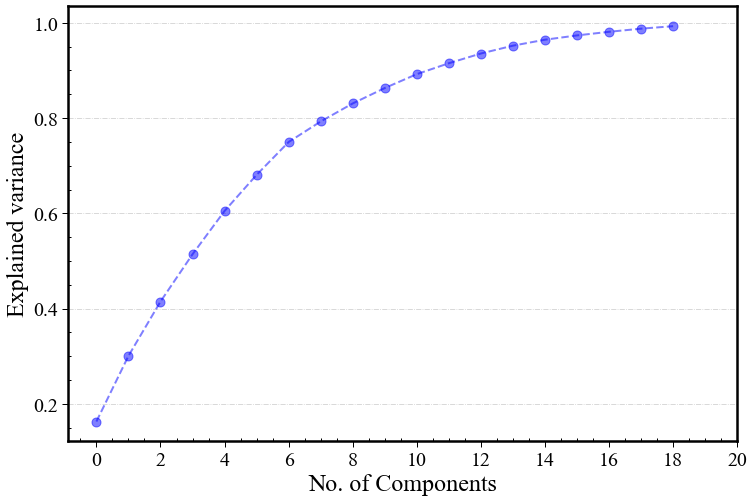

In [39]:
# 设置字体
plt.rcParams['font.family'] = ['Times New Roman'] # 设置字体族，中文为SimSun，英文为Times New Roman
# 设置背景颜色为灰色
plt.rcParams['axes.facecolor'] = "white"

plt.figure(figsize=(12,8))
#设置边框：
bwith = 2.5 #边框宽度设置为2
ax = plt.gca()#获取边框
# ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
# ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)


plt.grid(axis="y",alpha=.6,ls="-.")

plt.plot(np.cumsum(pca_.explained_variance_ratio_),color='BLUE',alpha=0.5,linestyle='--',linewidth=2,marker='o',markersize=9)

plt.xticks([i for i in range(0,22,2)])
plt.xlabel('No. of Components',fontsize=24)
plt.ylabel('Explained variance',fontsize=24)
plt.minorticks_on()
plt.tick_params(size=12,width=2, labelsize=20)
# 显示副刻度线
plt.tick_params(axis="both", which="major", direction="out", width=1,length=6,color="black")
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
# 设置主、副刻度线参数

plt.savefig('Elbow_plot.jpg',dpi=600)
plt.show()

In [47]:
print(X_pca_.shape)

df_new = pd.DataFrame(X_pca_ ,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])#,"PC20",'PC21','PC22','PC23','PC24',"PC25"])

df_new['target'] = Y
df_new.head()

(50, 19)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,target
0,-0.299333,-0.506519,0.703324,-1.031254,-1.636304,0.936114,0.198306,-1.085798,-0.205989,0.758912,-0.633123,-0.332210,0.489537,-0.607202,-0.993149,0.396951,-0.199619,-0.464731,0.125943,0.476254
1,-1.977764,0.386383,-2.152168,0.478273,-0.372122,1.288046,2.142099,1.173320,-0.248907,0.561731,0.047798,0.765694,0.677129,0.329481,0.658780,0.217787,-0.631495,-0.567937,-0.234796,0.602060
2,-2.793851,-1.192344,-2.552843,2.499938,-0.110338,-1.606968,-0.887609,-0.119352,0.425417,-0.715340,-0.617183,-1.075290,0.317563,-0.003757,-0.379011,-0.362161,0.224184,0.473542,0.133093,1.527402
3,-1.118018,0.881881,0.507410,0.308468,0.251901,-0.398928,-0.062188,0.648231,-1.802500,-0.173634,-0.295501,-0.600996,0.139418,-1.284358,0.843238,0.187228,-0.205613,-0.259945,-0.323743,-0.219323
4,-1.943484,-0.832201,-1.617463,1.571041,-0.155359,-0.503268,-0.809354,1.030212,0.131685,-0.244704,-0.113150,-0.548343,0.420070,-0.310296,-0.292277,0.044733,0.334218,-0.718160,0.279286,-0.421604


In [49]:
df_new.to_csv(".\\23PCA19.csv", index=False)